# Lesson 10 - Sentiment Analysis

## Author - Matthew Denko

This assignment requires that you build a sentiment analysis classifier for a series of tweets.
The data consists of a file "twitter_data.csv". The file contains 16,000 tweets with their respective score. The attributes are the sentences, and the score is either 4 (for positive) or 0 (for negative).

Assignment Instructions
1. Complete all questions below.
2. Comment on the applicability of the model on future tweets.  

In [1]:
#Imports

import matplotlib.pyplot as plt
import pandas
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
#Read files

url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/twitter_data.csv"
df = pandas.read_csv(url, sep=",")
df.columns = ["sentiment_label","tweet_text"]
print(df.head())

   sentiment_label                                         tweet_text
0                4  @elephantbird Hey dear, Happy Friday to You  A...
1                4  Ughhh layin downnnn    Waiting for zeina to co...
2                0  @greeniebach I reckon he'll play, even if he's...
3                0              @vaLewee I know!  Saw it on the news!
4                0  very sad that http://www.fabchannel.com/ has c...


## Q1: Generate word cloud for positive sentiment.

In [3]:
# Splitting data for positive sentiment

df4 = df[df.sentiment_label == 4]
text4 = df4.loc[:,"tweet_text"]

There are 5926663 words in the combination of all review.


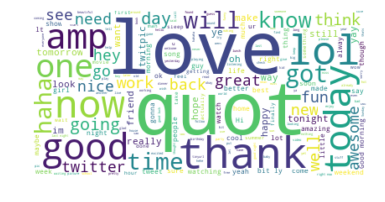

In [4]:
# Combining text

text4_final = " ".join(text4 for text4 in df4.tweet_text)
print ("There are {} words in the combination of all review.".format(len(text4_final)))
wordcloud = WordCloud(background_color="white").generate(text4_final)

# Creating the wordcloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Comments:

    The wordcloud was created for all 5926663 words. The most frequently appearing words in positive sentiment tweets appear to be love, thank, quot, lol.

## Q2: Generate word cloud for negative sentiment.

In [5]:
# Splitting data for negative sentiment

df0 = df[df.sentiment_label == 0]
text0 = df0.loc[:,"tweet_text"]

There are 5966572 words in the combination of all review.


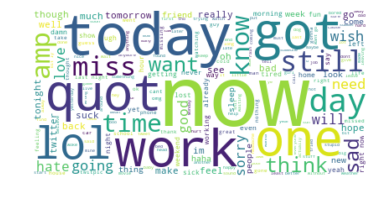

In [6]:
# Combining text

text0_final = " ".join(text0 for text0 in df0.tweet_text)
print ("There are {} words in the combination of all review.".format(len(text0_final)))
wordcloud = WordCloud(background_color="white").generate(text0_final)

# Creating the wordcloud

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Comments:

    The wordcloud was created for all 5966572 words. The most frequently appearing words in negative sentiment tweets appear to be work, today, now.

## Q3: Split data into 70% for training and 30% for testing.

In [7]:
# Create X & Y

X = df.tweet_text
y = df.sentiment_label

# Create train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

## Q4: Build a classifier that classifies the sentiment of a sentence.

In [8]:
# Extracting features from text files


text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfVectorizer()),
                      ('clf', MultinomialNB()),])

In [9]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1, 2))),
    ('classifier',  MultinomialNB()) ])

In [10]:
# fit the model to our traninig set

clf_training = pipeline.fit(X_train, y_train)

## Q5: What is the accuracy of your model when applied to testing data?

In [11]:
# Accuarcy of training data

predicted = pipeline.predict(X_train)
np.mean(predicted == y_train) * 100

95.60089285714287

In [12]:
# Accuracy of test data

test_predicted = pipeline.predict(X_test)
np.mean(test_predicted == y_test) * 100

77.92708333333334

### Comments:

    The accuracy of the training data is around 95%, while the accuracy of the test data is around 78%. This means that 78% of the predictions were predicted correctly.

## Q6: What conclusions can you draw from the model?

### Comments:
    
    I can draw from the model that around 78% of the time given a tweet we can predict what the measured sentiment was from this data set. This means that this model is fairly effective at predicting whether something has a positive sentiment vs a negative sentiment. Given the large sample size I would infer that this model would be fairly accurate at predicting the sentiment of future tweets.

## Q7: Is it better to have a model per source?

### Comments:

    I think it is better to a have a model per source, in this example I think the twitter data varied too much, which caused overlap between positive and negative sentiment. If the source data is narrowed down to a specific category of sentiment I think it would be much easier to interpret the results.